In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv('all_data.csv')

In [3]:
#data

,Unnamed: 0,frame,p1_post_positionX,p1_post_positionY,p1_post_facingDirection,p1_post_percent,p1_post_shieldSize,p1_post_stocksRemaining,p1_post_lCancelStatus,p2_post_positionX,p2_post_positionY,p2_post_facingDirection,p2_post_percent,p2_post_shieldSize,p2_post_stocksRemaining,p2_post_lCancelStatus,stageId,winner
0,0,15,29.235846,25.000099,-1,0.000000,60.0,4,0.0,-11.293736,31.280098,1,0.000000,60.000000,4,0.0,3,False
1,1,30,26.403950,25.000099,-1,0.000000,60.0,4,0.0,-11.293736,7.740095,1,0.000000,60.000000,4,0.0,3,False
2,2,45,24.824450,27.958099,-1,0.000000,60.0,4,0.0,-17.622486,0.000100,-1,0.000000,60.000000,4,0.0,3,False
3,3,60,8.288322,34.108097,-1,0.000000,60.0,4,0.0,-29.774284,28.980099,1,0.000000,60.000000,4,0.0,3,False
4,4,75,-3.019057,14.410093,-1,0.000000,60.0,4,0.0,-33.895912,25.000099,1,0.000000,60.000000,4,0.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474125,874,13125,38.080093,186.914108,1,119.260002,60.0,1,0.0,7.753224,0.008900,-1,78.880005,59.439968,1,0.0,28,False
474126,875,13140,38.080093,171.063354,1,119.260002,60.0,1,0.0,9.153223,0.008900,-1,78.880005,60.000000,1,0.0,28,False
474127,876,13155,38.080093,155.212601,1,119.260002,60.0,1,0.0,12.153220,0.008900,-1,78.880005,60.000000,1,0.0,28,False
474128,877,13170,38.080093,139.361847,1,119.260002,60.0,1,0.0,15.153217,7.358898,-1,78.880005,60.000000,1,0.0,28,False


In [196]:
no_transforms = ['frame','p1_post_shieldSize','p1_post_stocksRemaining','p2_post_shieldSize','p2_post_stocksRemaining']
show = ['p1_post_positionX', 'p2_post_positionX']
N_ft = 10
window_size = 6000
def sigmoid(x):
    return 1 / (1+ np.exp(-x))
def ft_col(col):
    n = len(col)
    if (n < 30):
        n = 30
#     n = window_size
#     n = 100
#     ft = np.fft.fft(frames[col], 100, norm='ortho')
#     ft = np.fft.fft(frames[col], 100)
    ft = np.fft.fft(col, n)
#     ft = np.fft.fftshift(ft)
    ft = ft[0:N_ft] 
#         mid = int(n/2)
#         t = int(n/3)
#         ft = ft[mid-t:mid+t]
#         print(mid-t, mid+t)
    freq = np.fft.fftfreq(n)
#     freq = np.fft.fftshift(freq)
    freq = freq[0:N_ft]
#     print(freq)
#         freq = freq[mid-t:mid+t]

    return ft,freq
    
def ft_data(frames : pd.DataFrame):
    n = len(frames)
#     print(n)
    x = []
    for col in frames.columns:
        if col in no_transforms:
            continue
#         print(col)
        if col not in show:
            continue
#         plt.plot(frames[col])
#         plt.show()
        
    p1x, freq = ft_col(frames['p1_post_positionX'])
    p2x, freq = ft_col(frames['p2_post_positionX'])
#     pdx, freq = ft_col(frames['p2_post_positionX'] - frames['p1_post_positionX'])
#     plt.plot(frames['p2_post_positionX'] - frames['p1_post_positionX'])
#     plt.show()
    plt.plot(freq, p1x.real)
    plt.show()
#     plt.plot(freq, p2x.real)
#     plt.show()
#     plt.plot(freq, p1x.real + p2x.real)
# #     plt.plot(freq, pdx.real)
# #     plt.plot(p1x.real, p2x.real)
# #         plt.plot(freq, sigmoid(ft.real))
#     plt.show()
    p1y, freq = ft_col(frames['p1_post_positionY'])
    p2y, freq = ft_col(frames['p2_post_positionY'])
#     plt.plot(freq, p1y.real)
#     plt.show()
#     plt.plot(freq, p2y.real)
#     plt.show()
#     plt.plot(freq, p1x.real - p2x.real)
#     plt.show()
    
    p1p, freq = ft_col(frames['p1_post_percent'])
    p2p, freq = ft_col(frames['p2_post_percent'])
    
    x = frames.tail(1).values.tolist()[0]
#     print(x)
    x += list(p1x.real)
    x += list(p2x.real)
    x += list(p1x.real + p2x.real)
    x += list(p1y.real)
    x += list(p2y.real)
    x += list(p1y.real - p2y.real)
    x += list(p1p.real)
    x += list(p2p.real)
    x += list(p1p.real - p2p.real)
    return np.array(x)

bam11
mm1-4-Game_20190519T181023.csv


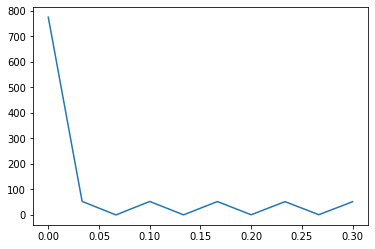

1 15


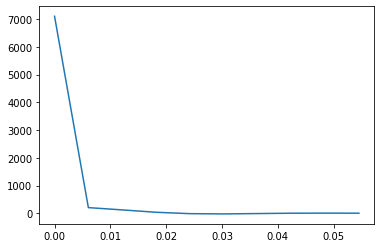

2 165


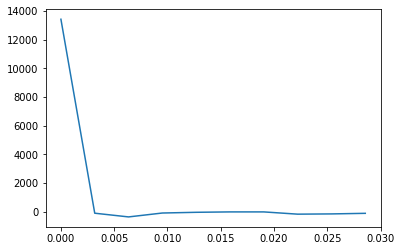

3 315


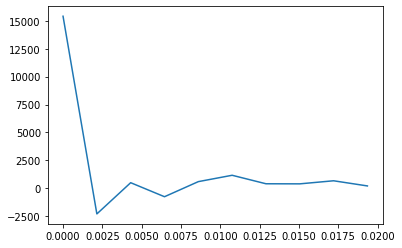

4 465


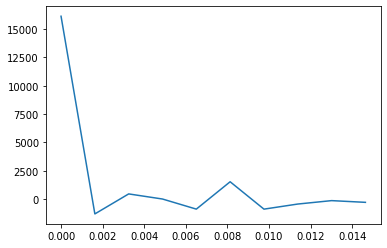

5 615


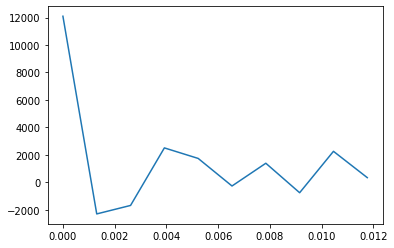

6 765


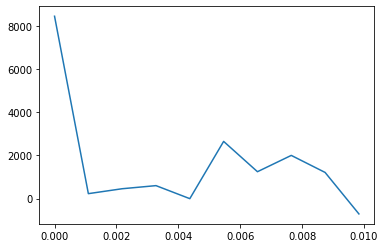

7 915


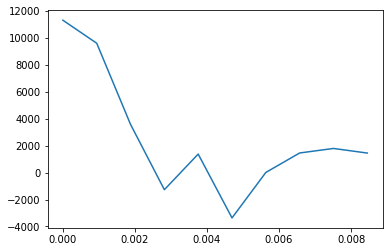

8 1065


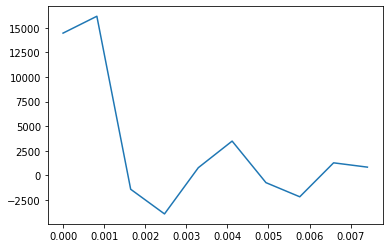

9 1215


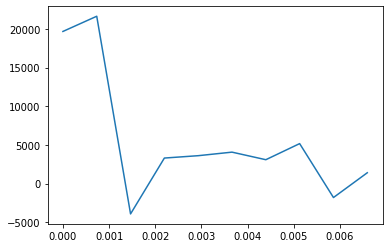

10 1365


,frame,p1_post_positionX,p1_post_positionY,p1_post_facingDirection,p1_post_percent,p1_post_shieldSize,p1_post_stocksRemaining,p1_post_lCancelStatus,p2_post_positionX,p2_post_positionY,...,p_dft_0,p_dft_1,p_dft_2,p_dft_3,p_dft_4,p_dft_5,p_dft_6,p_dft_7,p_dft_8,p_dft_9
0,15.0,51.208477,27.200100,-1.0,0.0,60.000000,4.0,NaN,-38.799999,27.2001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,165.0,41.593983,27.200100,-1.0,0.0,60.000000,4.0,NaN,-8.365628,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,315.0,16.559807,47.040096,1.0,0.0,60.000000,4.0,NaN,-0.227007,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,465.0,18.049974,0.000100,1.0,0.0,59.230003,4.0,NaN,-55.473457,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,615.0,-24.976021,0.000100,1.0,0.0,60.000000,4.0,NaN,-11.273748,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,765.0,-9.355419,0.000100,1.0,0.0,60.000000,4.0,NaN,30.732433,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,915.0,3.738513,39.906094,1.0,0.0,60.000000,4.0,NaN,47.705219,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1065.0,8.915407,39.672092,-1.0,0.0,60.000000,4.0,NaN,-13.684076,0.0001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1215.0,2.083143,20.416098,-1.0,0.0,60.000000,4.0,NaN,-19.286568,0.0001,...,-648.0,-632.821136,-588.552228,-518.870405,-429.498106,-327.639999,-221.281493,-118.423676,-26.335523,49.098967
9,1365.0,71.603462,9.505998,1.0,17.0,60.000000,4.0,NaN,20.024052,0.0001,...,-153.0,96.672923,665.241851,1143.019453,1185.636171,749.793870,101.087882,-395.294869,-529.106129,-355.188147


In [201]:
cnt = 0
all_data = []
for d in os.listdir('data'):
    print(d)
    for f in os.listdir(os.path.join('data', d)):
        print(f)
        data = pd.read_csv(os.path.join('data', d, f))
        n = len(data)
        for i in range(15,n,150):
            x = ft_data(data[0:i])
            all_data.append(x)
#             print(data['winner'])
            cnt += 1
            print(cnt, i)
            if cnt >= 10:
                break
        break
    break
ft_p1x_columns = ['p1x_ft_%d'%i for i in range(N_ft)]
ft_p2x_columns = ['p2x_ft_%d'%i for i in range(N_ft)]
ft_dx_columns = ['x_dft_%d'%i for i in range(N_ft)]
ft_p1y_columns = ['p1y_ft_%d'%i for i in range(N_ft)]
ft_p2y_columns = ['p2y_ft_%d'%i for i in range(N_ft)]
ft_dy_columns = ['y_dft_%d'%i for i in range(N_ft)]
ft_p1p_columns = ['p1p_ft_%d'%i for i in range(N_ft)]
ft_p2p_columns = ['p2p_ft_%d'%i for i in range(N_ft)]
ft_dp_columns = ['p_dft_%d'%i for i in range(N_ft)]
all_data = pd.DataFrame(all_data, columns=(list(data.columns)+
                                           ft_p1x_columns+ft_p2x_columns+ft_dx_columns+
                                           ft_p1y_columns+ft_p2y_columns+ft_dy_columns+
                                           ft_p1p_columns+ft_p2p_columns+ft_dp_columns))
all_data

In [ ]:
all_data.to_csv('all_data.csv')